# How To Export a YOLOv8 Model Trained in Supervisely

After you have trained a model using Train YOLOv8 app, you can download the best checkpoint from Team Files and use your trained YOLOv8 model outside Supervisely Platform.

## 1. Download checkpoint from Team Files

1. Go to Team Files

![team_files_1](https://github.com/supervisely-ecosystem/yolov8/assets/91027877/d95a548b-e7dd-4e4a-a1fa-0c7a62ad62ac)

2. Download trained checkpoint

![team_files_2](https://github.com/supervisely-ecosystem/yolov8/assets/91027877/b33eaeb6-1a07-427d-9c36-5709c4fc1037)

Alternatively, you can download these files using Supervisely API:

In [ ]:
# Install supervisely SDK if not installed
!pip install supervisely

To download files via Supervisely API, you will need to define [server address](https://developer.supervisely.com/getting-started/basics-of-authentication#server_address-env), [api token](https://developer.supervisely.com/getting-started/basics-of-authentication#api_token-env) and [team id](https://developer.supervisely.com/getting-started/environment-variables#team_id):

In [ ]:
import supervisely as sly


server_address = "https://..."
api_token = "abcd0123456789..."
team_id = ...
path_to_weights_in_team_files = ...
download_dir = "./my_model"

api = sly.Api(server_address, api_token)
api.file.download(team_id, path_to_weights_in_team_files, f"{download_dir}/weights.pth")

## 2. Install necessary libraries

In [ ]:
!pip install torch==1.10.1+cu113 --extra-index-url https://download.pytorch.org/whl/cu113
!pip install torchvision==0.11.2+cu113 --extra-index-url https://download.pytorch.org/whl/cu113
!pip install ultralytics==8.0.112

## 3. Build the model and load it on device

In [18]:
import torch
from ultralytics import YOLO

weights_path = "../my_model/weights.pt"
model = YOLO(weights_path)

if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = "cpu"

## 4. Inference & visualization of results

Let's see how input image looks like:

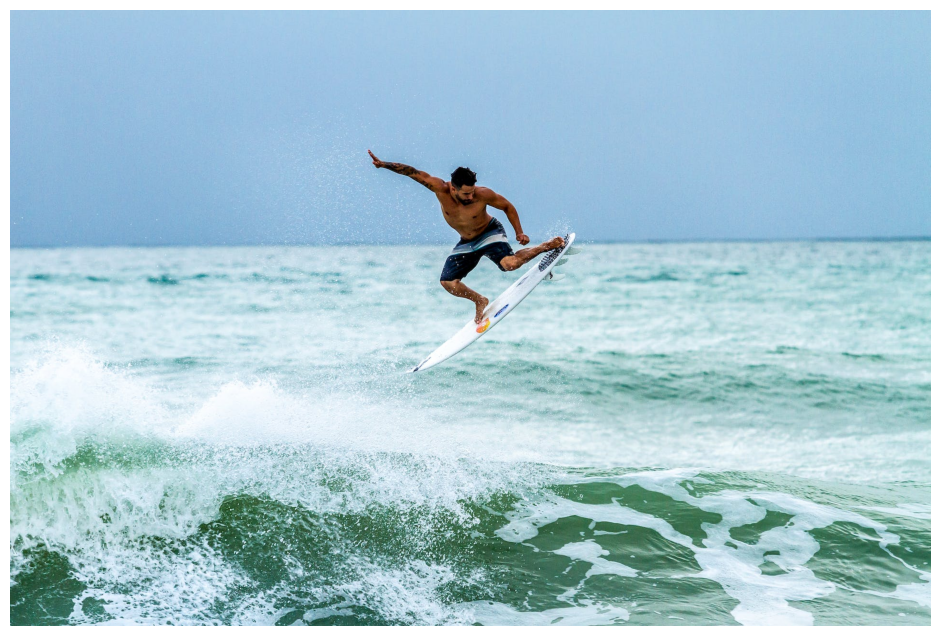

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# function for image visualization
def visualize_image(image_filepath):
    plt.figure(figsize=(12, 8))
    image = mpimg.imread(image_filepath)
    imageplot = plt.imshow(image)
    plt.axis("off")
    plt.show()

image_path = "image_0.jpg"
visualize_image(image_path)

Since YOLOv8 supports multiple computer vision tasks - object detection, instance segmentation and pose estimation - we will provide an inference and visualization example for each task. 

### 4.1 Object detection

In [8]:
predictions = model(image_path)
boxes_data = predictions[0].boxes.data
for box in boxes_data:
    left, top, right, bottom, confidence, cls_index = (
        int(box[0]),
        int(box[1]),
        int(box[2]),
        int(box[3]),
        float(box[4]),
        int(box[5]),
    )
    print(f"Class: {cls_index}, confidence: {confidence}, coordinates: {[top, left, bottom, right]}")


image 1/1 /Users/maxteselkin/Coding/supervisely_projects/yolov8/outside_supervisely/image_0.jpg: 448x640 1 person, 1 surfboard, 215.6ms
Speed: 3.7ms preprocess, 215.6ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)


Class: 0, confidence: 0.9467626810073853, coordinates: [288, 745, 666, 1159]
Class: 37, confidence: 0.9275181889533997, coordinates: [463, 840, 757, 1179]


In [ ]:
model.predict(image_path, save=True)

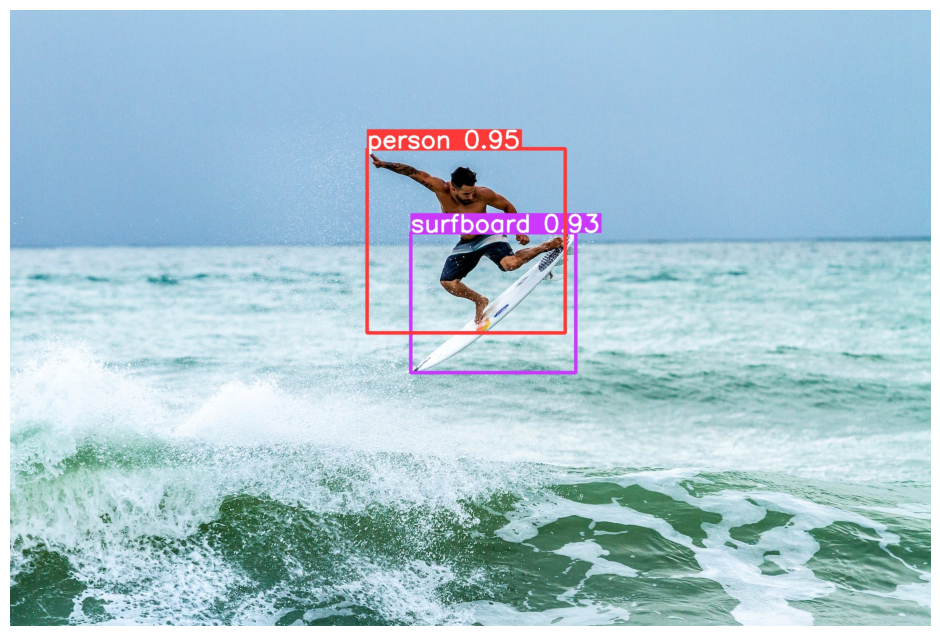

In [5]:
result_path = "runs/detect/predict/image_0.jpg"
visualize_image(result_path)

### 4.2 Instance segmentation

In [19]:
predictions = model(image_path)
boxes_data = predictions[0].boxes.data
masks = predictions[0].masks.data
for box, mask in zip(boxes_data, masks):
    left, top, right, bottom, confidence, cls_index = (
        int(box[0]),
        int(box[1]),
        int(box[2]),
        int(box[3]),
        float(box[4]),
        int(box[5]),
    )
    # yolov8 returns masks for reshaped image
    # if you want to interpolate mask to original size, you can use torch:
    # mask = torch.unsqueeze(mask, 0)
    # mask = torch.unsqueeze(mask, 0)
    # mask = torch.nn.functional.interpolate(
    #     mask, (input_height, input_width), mode="nearest"
    # )
    # mask = mask.squeeze()
    mask = mask.cpu().numpy()
    print(f"Class: {cls_index}, confidence: {confidence}, coordinates: {[top, left, bottom, right]}")
    print(f"Mask shape: {mask.shape}")


image 1/1 /Users/maxteselkin/Coding/supervisely_projects/yolov8/outside_supervisely/image_0.jpg: 448x640 1 person, 1 surfboard, 168.1ms
Speed: 2.0ms preprocess, 168.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Class: 0, confidence: 0.9467626810073853, coordinates: [288, 745, 666, 1159]
Mask shape: (448, 640)
Class: 37, confidence: 0.9275181889533997, coordinates: [463, 840, 757, 1179]
Mask shape: (448, 640)


In [ ]:
model.predict(image_path, save=True)

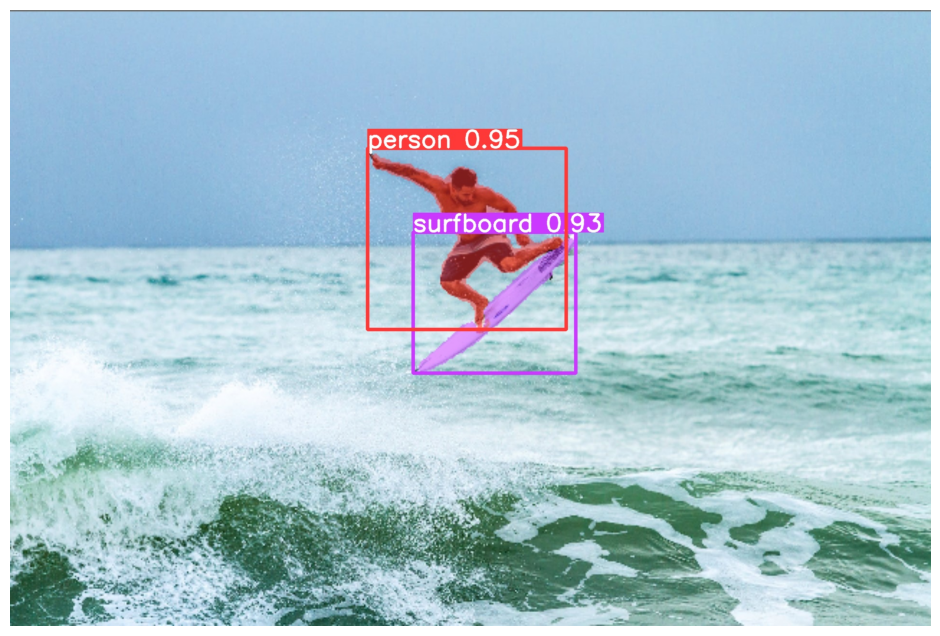

In [11]:
result_path = "runs/segment/predict/image_0.jpg"
visualize_image(result_path)

### 4.3 Pose estimation

In [15]:
predictions = model(image_path)
boxes_data = predictions[0].boxes.data
keypoints_data = predictions[0].keypoints.data
for box, keypoints in zip(boxes_data, keypoints_data):
    left, top, right, bottom, confidence, cls_index = (
        int(box[0]),
        int(box[1]),
        int(box[2]),
        int(box[3]),
        float(box[4]),
        int(box[5]),
    )
    print(f"Class: {cls_index}, confidence: {confidence}, coordinates: {[top, left, bottom, right]}")
    print(f"Keypoints shape: {keypoints.shape}")


image 1/1 /Users/maxteselkin/Coding/supervisely_projects/yolov8/outside_supervisely/image_0.jpg: 448x640 1 person, 146.3ms
Speed: 2.1ms preprocess, 146.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Class: 0, confidence: 0.9303991198539734, coordinates: [295, 745, 675, 1159]
Keypoints shape: torch.Size([17, 3])


In [ ]:
model.predict(image_path, save=True)

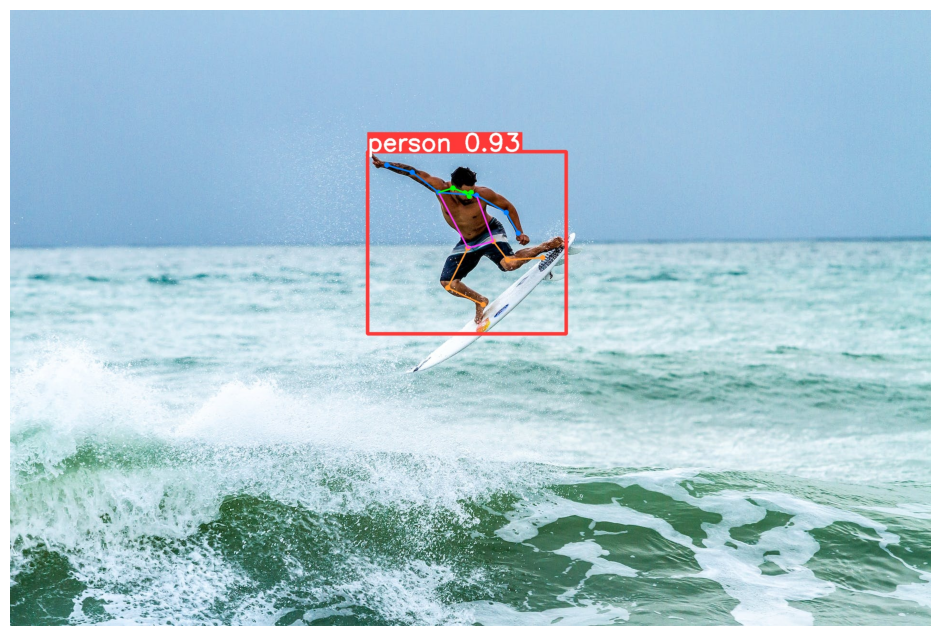

In [17]:
result_path = "runs/pose/predict/image_0.jpg"
visualize_image(result_path)